In [1]:
from sklearn import metrics
import os
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline

In [2]:
ytrue = np.array([[2, 1, 1],
                   [1, 1, 0]])
ypred = np.array([[1, 2, 1],
                   [1, 0, 0]])

def get_scores(y_true, y_pred):
    results=[]
    y_true=y_true.flatten()
    y_pred=y_pred.flatten()
    #Overall precision
    results.append(metrics.precision_score(y_true, y_pred, average='micro'))
    #Per-class precision
    results.append(metrics.precision_score(y_true, y_pred, average='macro'))
    #jaccard (right average?)
    results.append(metrics.jaccard_score(y_true, y_pred, average='macro'))
    return results
get_scores(ytrue,ypred)

[0.5, 0.38888888888888884, 0.3]

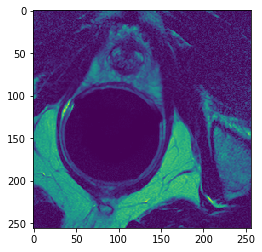

In [12]:
train_images_path='project3_data/data/train_images'
train_labels_path='project3_data/data/train_labels'
test_images_path='project3_data/data/test_images'
rotated_images_path='project3_data/data/test_images_randomly_rotated'

#placeholder for now
def rotate(image):
    return image
#list of np arrays with size[256,256]
train_images=[]
train_images_nz=[]#train_images_non-zero
#list of np arrays with size[256,256]
train_labels=[]
train_labels_nz=[] #train_labels_non_zero

for file in os.listdir(train_images_path):
    images=np.load(train_images_path+'/'+file)
    labels=np.load(train_labels_path+'/'+file)
    overall_depth=images.shape[0]
    for curr_depth in range(overall_depth):
        train_images.append(images[curr_depth])
        train_labels.append(labels[curr_depth])
        if np.amax(labels[curr_depth])>0:
            train_images_nz.append(images[curr_depth])
            train_labels_nz.append(labels[curr_depth])

#list of np arrays with size[256,256]
test_images=[]
#list of np arrays with size[256,256]
rotated_images=[]
for file in os.listdir(test_images_path):
    images=np.load(test_images_path+'/'+file)
    rotated=np.load(rotated_images_path+'/'+file)
    overall_depth=images.shape[0]
    for curr_depth in range(overall_depth):
        test_images.append(images[curr_depth])
        corrected=rotate(rotated[curr_depth])
        rotated_images.append(corrected)

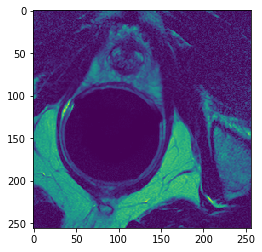

In [13]:
imshow(train_images[2])

842
668


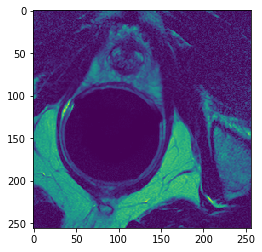

In [7]:
print(len(train_images))
print(len(train_images_nz))
imshow(train_images_nz[0])